In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from astropy.visualization.hist import hist
from sklearn.neighbors import KernelDensity
from scipy.integrate import quad

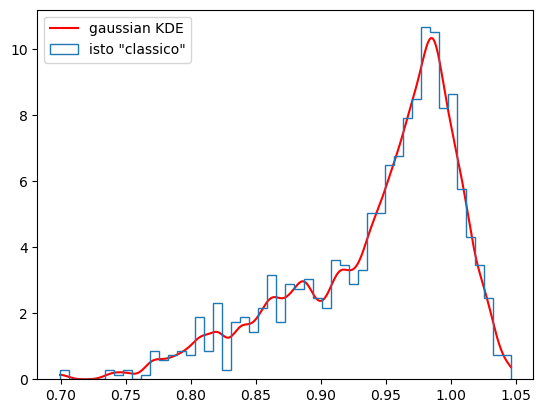

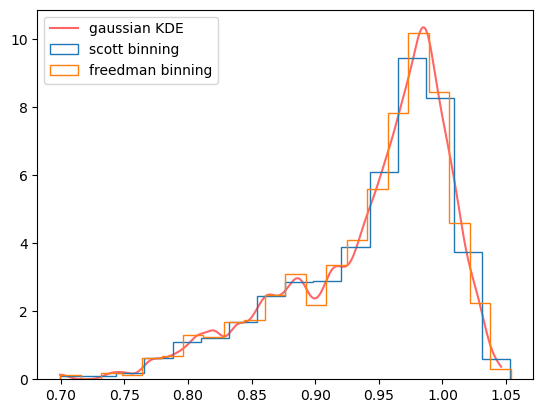

In [2]:
mu=1
sigma=0.02
#number of samples
N=1000   

distG = scipy.stats.norm(loc=mu , scale=sigma)
M = distG.rvs(N)

spin= np.random.uniform(0, 1, N)

f=np.sqrt((1+np.sqrt(1-spin**2))/2)
Mirr=M*f

#PLOT DI MIRR CON VARI METODI:

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) 

    return np.exp(log_pdf)

xgrid=np.linspace(min(Mirr), max(Mirr), 10000)
#bandwidth scelta a occhio
PDFgauss = kde_sklearn(Mirr, bandwidth=0.006, kernel="gaussian")  
plt.plot(xgrid, PDFgauss, color='red', label='gaussian KDE')
plt.hist(Mirr, bins=50, density=True, histtype="step", label='isto "classico"')
plt.legend()
plt.show()

plt.plot(xgrid,PDFgauss, color='red', alpha=0.6, label='gaussian KDE')
_ = hist(Mirr, bins="scott", histtype="step",density=True, label='scott binning')
_ = hist(Mirr, bins="freedman", histtype="step",density=True, label='freedman binning')
plt.legend()
plt.show()

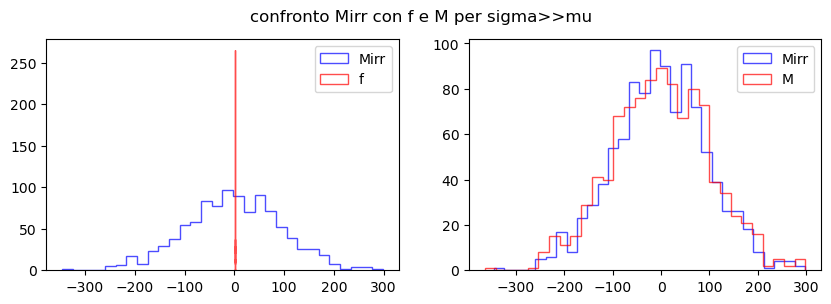

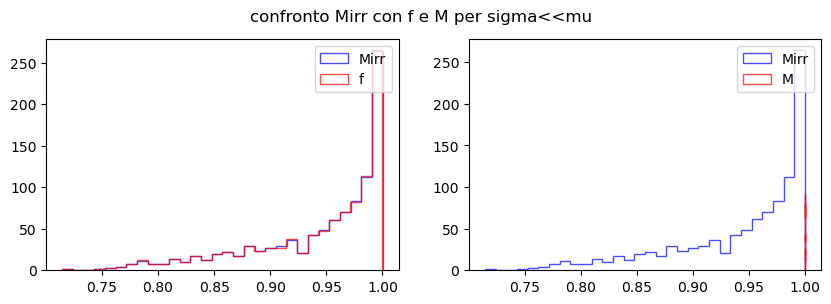

In [3]:
#Confronto Mirr con la distr f e M nei due limiti

#SIGMA>>MU:

distG = scipy.stats.norm(loc=mu, scale=100)
M = distG.rvs(N)
Mirr=f*M

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.hist(Mirr, bins=30, alpha=0.7, color='blue',histtype="step", label='Mirr')
ax1.hist(f, bins=30, alpha=0.7, color='red',histtype="step", label='f')
ax1.legend(loc='upper right')

ax2.hist(Mirr, bins=30, alpha=0.7, color='blue',histtype="step", label='Mirr')
ax2.hist(M, bins=30, alpha=0.7, color='red',histtype="step", label='M')
ax2.legend(loc='upper right')

fig.suptitle("confronto Mirr con f e M per sigma>>mu")
plt.show()

#SIGMA<<MU
distG = scipy.stats.norm(loc =mu , scale=0.0001)
M = distG.rvs(N)
Mirr=f*M
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.hist(Mirr, bins=30, alpha=0.7, color='blue',histtype="step", label='Mirr')
ax1.hist(f, bins=30, alpha=0.7, color='red',histtype="step", label='f')
ax1.legend(loc='upper right')

ax2.hist(Mirr, bins=30, alpha=0.7, color='blue',histtype="step", label='Mirr')
ax2.hist(M, bins=30, alpha=0.7, color='red',histtype="step", label='M')
ax2.legend(loc='upper right')

fig.suptitle("confronto Mirr con f e M per sigma<<mu")

plt.show()

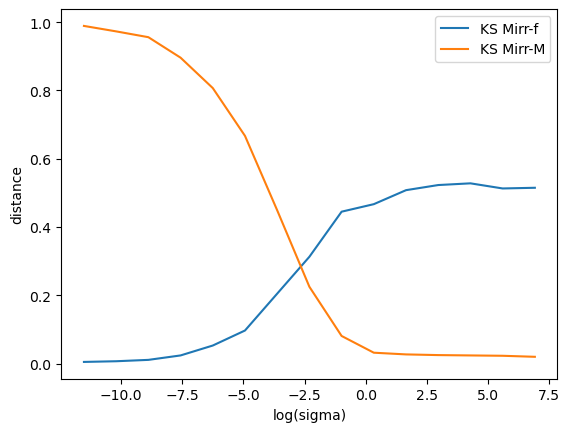

In [6]:
#KS test

sigmas=np.logspace(-5, 3, 15)  

f=np.sqrt((1+np.sqrt(1-spin**2))/2)

statistic_f=[]
pvalue_f=[]

statistic_M=[]
pvalue_M=[]

for s in (sigmas):
    M=scipy.stats.norm(loc=mu, scale=s).rvs(N)
    Mirr=f*M
    
    stat_f, p_f=scipy.stats.ks_2samp(Mirr, f)
    
    #restituisce il valore della distanza massima tra le due cdf
    statistic_f=np.append(statistic_f, stat_f)  
    pvalue_f=np.append(pvalue_f, p_f)
    
    stat_M, p_M=scipy.stats.ks_2samp(Mirr, M)
    statistic_M=np.append(statistic_M, stat_M)  
    pvalue_M=np.append(pvalue_M, p_M)
    
plt.plot(np.log(sigmas), (statistic_f), label="KS Mirr-f")
plt.plot(np.log(sigmas), (statistic_M), label="KS Mirr-M")
plt.xlabel("log(sigma)")
plt.ylabel("distance")
plt.legend()
plt.show()

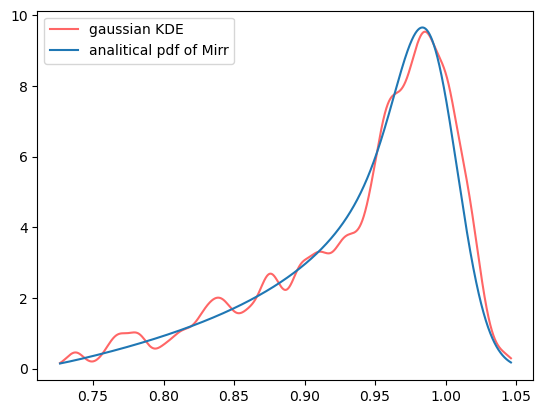

In [7]:
#plot della forma analitica di Mirr

mu=1
sigma=0.02
def f(x, m):
    return (np.exp(-(m/x-mu)**2/(2*sigma**2)))*(2*x**2-1)/(x*np.sqrt(1-x**2))

integral=[]

result = [quad(f , 1/np.sqrt(2), 1, args=m)[0] for m in xgrid]  

integral=np.append(integral, result)
analitical_pdf=integral*1/0.02*np.sqrt(2/np.pi)

distG = scipy.stats.norm(loc=mu , scale=sigma)
M = distG.rvs(N)
spin= np.random.uniform(0, 1, N)
f=np.sqrt((1+np.sqrt(1-spin**2))/2)
Mirr=M*f

xgrid=np.linspace(min(Mirr), max(Mirr), 10000)
PDFgauss = kde_sklearn(Mirr, bandwidth=0.006, kernel="gaussian")  
plt.plot(xgrid,PDFgauss, color='red', alpha=0.6, label='gaussian KDE')
plt.plot(xgrid, analitical_pdf, label='analitical pdf of Mirr')
plt.legend()
plt.show()